## The Socioeconomic Impact of the COVID Pandemic on European Nations,
## using Ireland as a Case Study.

## Abtract

This study investigated the impacts of COVID-19, hereafter COVID, as a two-pronged approach - health and economy. Several European nations were compared on their testing data and positive cases, and a contrast made in particular between smaller and larger nations. Ireland was a case study which is investigated in more detail against the backdrop of these European countries - comparing and contrasting it with its neighbours. 

Testing rates serve to give an idea of how each country implemented measures at the beginning of the pandemic. Positivity rates and new cases serve to give an idea of how widespread the virus was among the populace of each country.

Unemployment data from 2010 to 2019 serve to give an indication of each country's economic standing, as well as an idea of what might happen in future, due to job losses and potential recessions caused by lockdown. 

We find that Ireland's testing rates are similar to many of its neighbours. We also find that, in particular, after the initial phase of lockdown, there is a decrease of positive cases among the elderly and those over 65, whereas there is a very large increase in cases among younger age groups. This is evidence of the idea that, once lockdown was eased, younger age groups served as vectors of disease. Luckily, this increase among the young does not seem to cause an increase among the elderly - presumably still taking heavy precautions due to the implications of the disease on people of their age group. 

The Introduction gives a brief background of the situation. Then the Results section outlines data manipulation and findings, including plots and tables. Finally, a section at the end for final remarks gives a brief conclusion to the study. 

## Introduction

The period of SarsCoV-2 has been one of upheaval and uncertainty, to say the least. Worldwide, governments and societies have struggled to get a grip on a rapidly changing environment, and there has been a large amount of pushback and resistance to measures brought in to curb the spread of the disease. The rhetoric in this regard seems to have put two pertinent considerations - the health service of a country as well as the health of its older population, versus the economic health and the impacts of a self-inflicted recession on the younger and middle-aged population - at odds with each other. 

With this in mind, the aim of this report is to analyse both the visible effects on a health-service and population, as well as its effect on an economy, using a range of data from hospitals and testing data, as well as unemployment figures from several years. As there has been an extraordinary amount of variation among countries' reactions to COVID, and as countries vary a lot in economic terms also, we will restrict ourselves to Europe. By comparing countries with similar economic standing and which lie in the same geographic area, we will shed some light on the various situations in these countries and how they played out. By then focusing on Ireland as a specific case study, we hope to be able to gain some insight into how it and other similar countries might fare in the near future. 

The data to be used are figures on testing data from the beginning of the COVID pandemic, beginning in March, as well as unemployment data spanning the last twenty years. Then for our case study of Ireland, we will use data for hospital admissions, tests performed, and confirmed COVID cases, and detailed data relating to the spread of COVID across each county in Ireland. We will also look at monthly unemployment figures stretching from January 2019 to September 2020.

## Results

### Preprocessing Steps

Pandas, Numpy and Matplotlib are loaded, and the data read in as CSV files. We also load patches from Matplotlib, to help with plotting later on. 

* country_populations is data of worldwide populations for each country. We will subset this to just use European countries. 
* country_incomes is data of the relative income level for each country. We will again subset this. 
* country_unemployment is unemployment data going back to the 1960s. We will only use the years 2000-2020.

* country_daily_cases is data of daily COVID cases for all countries.
* europe_weekly_tests is weekly testing data for European countries. 

* ireland_county_cases is COVID cases by county in Ireland.
* ireland_hospitals is hospital data for Ireland.

* ireland_unemployment_under25 is unemployment data of people aged under 25, in Ireland, for both sexes.
* ireland_unemployment_over25 is unemployment data of people aged 25 and over, in Ireland, for both sexes. 

(continued below)

In [395]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [396]:
# reading in various datasets

country_populations = pd.read_csv('population_by_country_by_year.csv',header=4,index_col=0) 
country_incomes = pd.read_csv('country_income_groups.csv') 
country_unemployment = pd.read_csv('unemployment_by_country_by_year.csv',header=4,index_col=0) 
country_incomes.set_index(keys=country_incomes.TableName,drop=True,inplace=True)

country_daily_cases = pd.read_csv('daily-cases-by-country.csv',index_col=0)
europe_weekly_tests  = pd.read_csv('weekly_testing_data_europe.csv')

ireland_county_cases = pd.read_csv('cases_by_county_ireland.csv') 
ireland_hospitals = pd.read_csv('cases_and_hospital_data_ireland.csv')

ireland_unemployment_under25 = pd.read_csv('unemployment_ireland_by_month_by_region_by_age.csv',header=2,index_col=2,skiprows=[4,5],nrows=172)
ireland_unemployment_under25 = ireland_unemployment_under25.iloc[:,2:]

# create range to skip rows
over25_index = np.arange(4,526,1)
ireland_unemployment_over25 = pd.read_csv('unemployment_ireland_by_month_by_region_by_age.csv',header=2,index_col=2,skiprows=over25_index,nrows=172)
ireland_unemployment_over25 = ireland_unemployment_over25.iloc[:,2:]

The year_week column from europe_weekly_tests is shorted to just the weeks - as the cases all happened in 2020 so the year gives us no useful information,  and its type is changed to integer. We add a new column, new_cases_perc_thousand_pop. This is calculated by dividing the number of new cases, new_cases, by the respective populations, population, and then multiplying by 100 (to get the percentage) and then again by 1000 (to get the percentage, per 1000 people). The other columns from europe_weekly_tests which we will look at are already in this format.

We get a list of European countries from the index of europe_weekly_tests, and then use this list to subset country_unemployment so that we just get the unemployment figures for European countries. We also subset this to only include unemployment figures from the last twenty years (2000-2020). We are particularly interested in comparing unemployment figures during the 2008 crash, and so this two-decade span will give us enough information for before, during, and after this period. Prior to 2000, there are too many other factors in European economies to make comparison to today usefel in this small study. 

Finally, we also subset country_incomes using the same list of European countries.

In [397]:
# change year_week to just week number, change data type to integer
europe_weekly_tests.year_week = europe_weekly_tests.year_week.map(lambda x : int(x[6:]))
# note - throws error if cell ran more than once. Need to rerun cell above first. 

# rename column year_week to week
europe_weekly_tests = europe_weekly_tests.rename(columns = {'year_week':'week'})
# calculate new_cases_perc_thousand_pop, as discussed above
europe_weekly_tests['new_cases_perc_thousand_pop'] = ((europe_weekly_tests.new_cases / europe_weekly_tests.population)*100)*1000

# get list of Euroean countries
european_countries = europe_weekly_tests.country.unique().tolist()
# subset country_unemployment to get unemployment just for European countries
europe_unemployment = country_unemployment.loc[country_unemployment.index.intersection(european_countries)].iloc[:,-21:]

# subset country_incomes to get just income classification data for European countries
europe_incomes = country_incomes.loc[country_incomes.index.intersection(european_countries)]
europe_incomes.drop(['TableName'],axis=1,inplace=True)

In order to get a sense of how different European countries compare in COVID response and unemployment figures, we must get a sense of similarities between countries. Common measures of comparison are population size, GDP and other economic measures, and development index. 

We see in the below table that all European countries bar one are classed as High Income in this dataset. While Europeans may not see all economies across Europe as equal or even similar, in relative terms with all countries worldwide, this classification is understandable. We also have no indication of development index for European countries in these data. 

Therefore, we will use population as a measure of comparison and contrast between countries. 

In [398]:
# almost all countries classed as High Income
europe_incomes

,Country Code,Region,IncomeGroup
Austria,AUT,Europe & Central Asia,High income
Belgium,BEL,Europe & Central Asia,High income
Bulgaria,BGR,Europe & Central Asia,Upper middle income
Cyprus,CYP,Europe & Central Asia,High income
Germany,DEU,Europe & Central Asia,High income
Denmark,DNK,Europe & Central Asia,High income
Spain,ESP,Europe & Central Asia,High income
Estonia,EST,Europe & Central Asia,High income
Finland,FIN,Europe & Central Asia,High income
France,FRA,Europe & Central Asia,High income


We will compare COVID rates as a standardised measure of how each country copes with the virus. Standardised here means that the figures will be divided by the population and then multiplied by 1000, in order to get the percentage per 1000 people. This gives much more readable and intuitive figures. It would be misleading to compare raw figures, as the figures for a country with 5 million people versus those for a country with 50 million people will by nature by vastly different, if they are not standardised. 

We want to visualise how small countries and large countries compare on three testing measures - testing rate (i.e. cumulative tests performed per 1000 people), positivity rate (proportion of those tests returning a positive result, per 1000 people), and new cases per 1000 people. 

Just by visual comparison, we can see that there are several somewhat pronounced jumps in population between countries around 10 million, 25 million, 50 million, and 60 million. 

As a somewhat arbitrary value, we can choose a cut-off of population around 12 million and under to be a 'Small' country, and those countries with a population of above 12 million to be 'Large' countries. Ireland therefore falls into the 'Small' camp. We will add a 'size' column below, as a categorical variable. 

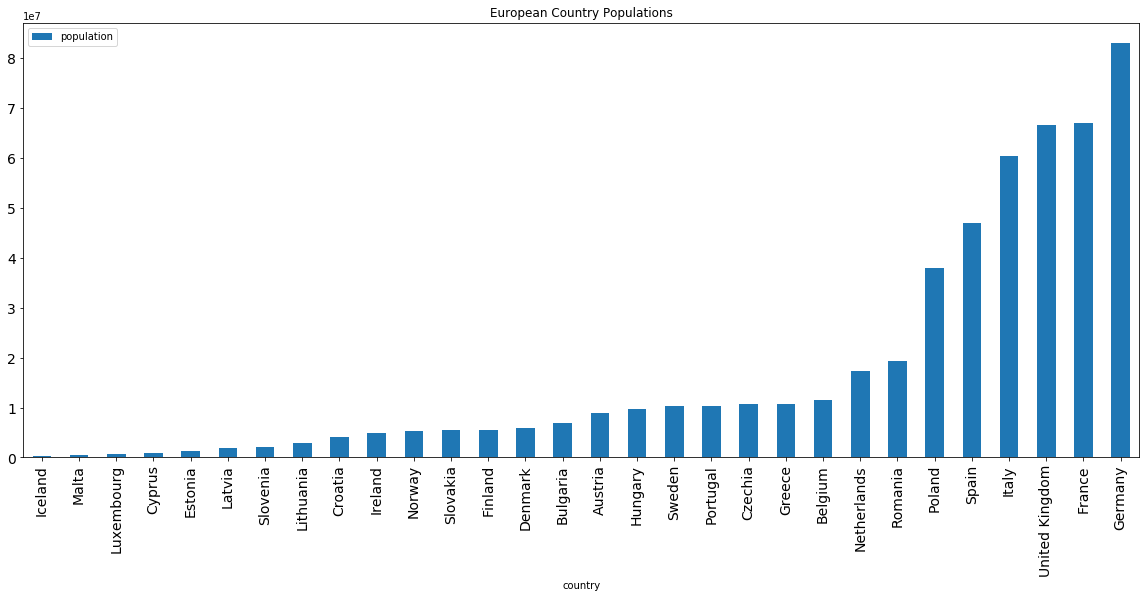

In [399]:
europe_populations = europe_weekly_tests[['country','population']].drop_duplicates().sort_values(by='population')

europe_populations.set_index(keys=europe_populations.country,drop=True,inplace=True)
europe_populations.drop(['country'],axis=1,inplace=True)

europe_populations.plot(kind='bar',figsize=(20,8), title='European Country Populations',fontsize=14);

In [400]:
# adding size column

# initialise column to None
europe_populations['size'] = None

# subset based on population size, and assign either 'Small' or 'Large'
europe_populations.loc[europe_populations['population'] < 12000000, 'size'] = 'Small'
europe_populations.loc[europe_populations['population'] > 12000000, 'size'] = 'Large'

europe_populations

,population,size
country,,
Iceland,356991,Small
Malta,493559,Small
Luxembourg,613894,Small
Cyprus,875899,Small
Estonia,1324820,Small
Latvia,1919968,Small
Slovenia,2080908,Small
Lithuania,2794184,Small
Croatia,4076246,Small


Now we can perform some exploratory data analysis on our three measures of interest. First, we simply plot the three measures of interest with a legend of country name. The results give us some insight but are a little hard to interpret. We therefore plot all countries with colour depending on their classification of Small or Large. We exempt Ireland from this, and then superimpose a plot of Ireland's figures on top, in order to see how it compares to its similar and dissimilar neighbours. 

A note about filling NA values with 0 below - this does not imply that the cases were at 0, rather it implies that tests were not being done. Therefore, we must assume that COVID was spreading among populations before tests were being performed. 

A further note - positivity rate and new cases are entirely dependent on the number of tests being done. If a country is not performing tests, and not encouraging people to get tested, or furthermore as was the case in some countries - imposing certain criteria on those who could get tested such as symptoms present - then we must take these figures with a grain of salt. 

That being said, as test rates increase among a population, it is reasonable to assume that the positivity rate and new cases rate shown approach the real figure in the population. 

In [401]:
# subset our three measures of interest in order to pivot tables 
testing_rate = europe_weekly_tests[['country','week','testing_rate']] 
positivity_rate = europe_weekly_tests[['country','week','positivity_rate']]
new_cases = europe_weekly_tests[['country','week','new_cases_perc_thousand_pop']]

# pivot tables in order to turn entries of Week column into columns themselves. Fill NaN values with 0.
# 0 is a reasonable value to fill NaN values with, as before testing commenced, all tests were effectively 0.

testing_rate = testing_rate.pivot(index='country', columns= 'week', values = 'testing_rate').fillna(0)
positivity_rate = positivity_rate.pivot(index='country', columns= 'week', values = 'positivity_rate').fillna(0)
new_cases = new_cases.pivot(index='country', columns= 'week', values = 'new_cases_perc_thousand_pop').fillna(0)

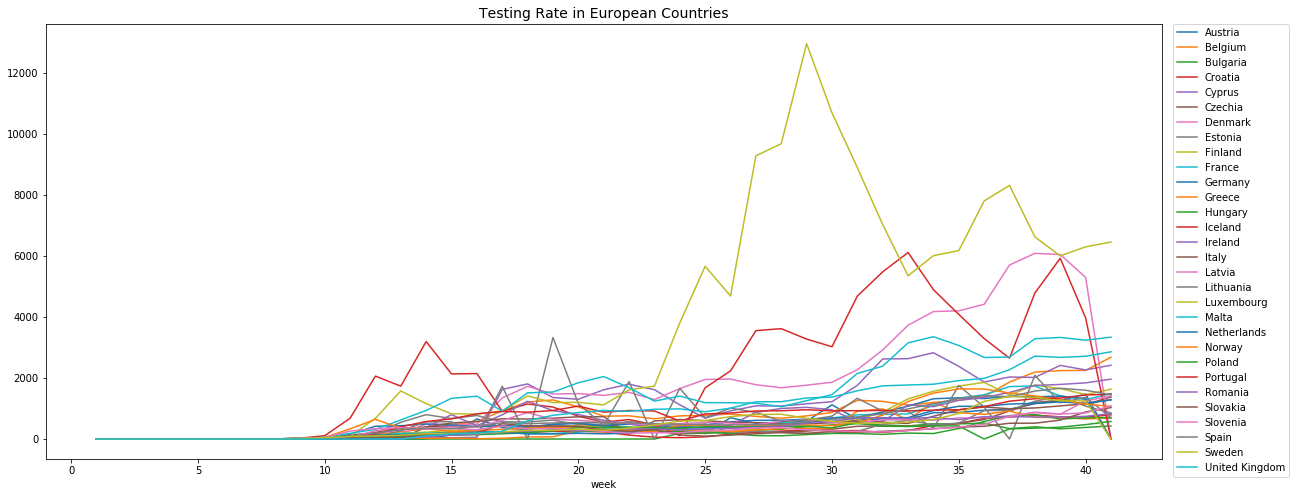

In [402]:
# line plot of testing rate - data frame must be transposed to plot values by country, else it plots values by week
testing_rate.T.plot.line(figsize=(20,8))
plt.title('Testing Rate in European Countries',fontsize=14);
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.);

In the above plot, we see that a large portion of the countries share similar testing rates, and there are a few outliers with very large rates. This is an illustration of the initiatives of those countries undertaken. I.e., many European countries had similar responses in terms of implementing testing, with only a handful of countries implementing widescale testing.

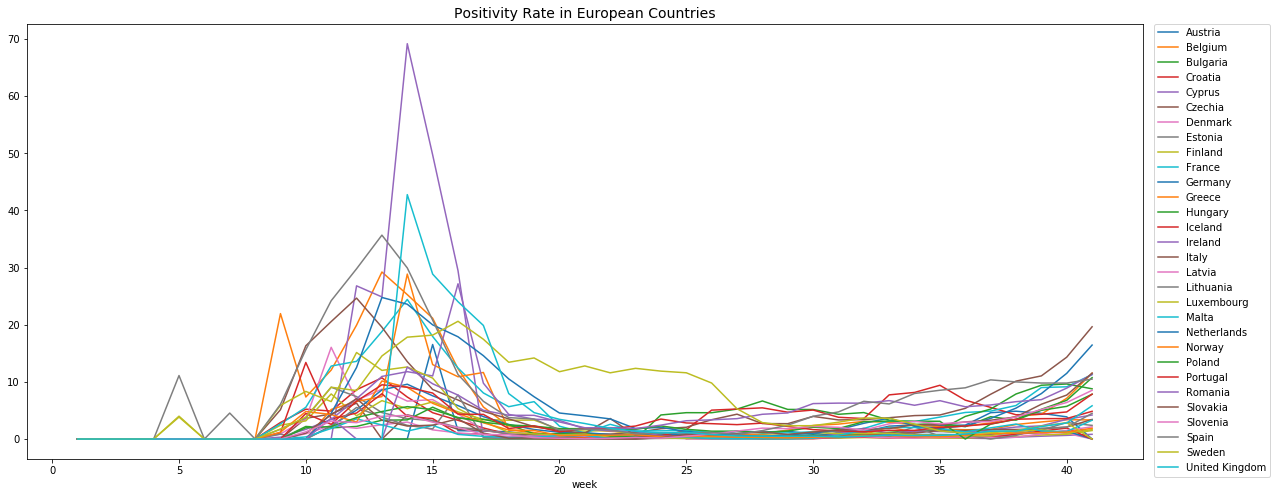

In [403]:
# line plot of positivity rate (transposed)
positivity_rate.T.plot.line(figsize=(20,8))
plt.title('Positivity Rate in European Countries',fontsize=14);
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.);

Above we see a general trend of a large spike in positivity rate around weeks 10 to 15. This corresponds to the period spanning the beginning of March to mid-April, the time when COVID really took hold in Europe. Some countries seem to have an alarming rate of positive tests, but many more countries have a smaller rate. We see that as the weeks progress, the positivity rate tends to stabilise for all countries, and we see the beginning of an upward trend around weeks 38 to 40 - corresponding with the second wave, beginning in September. 

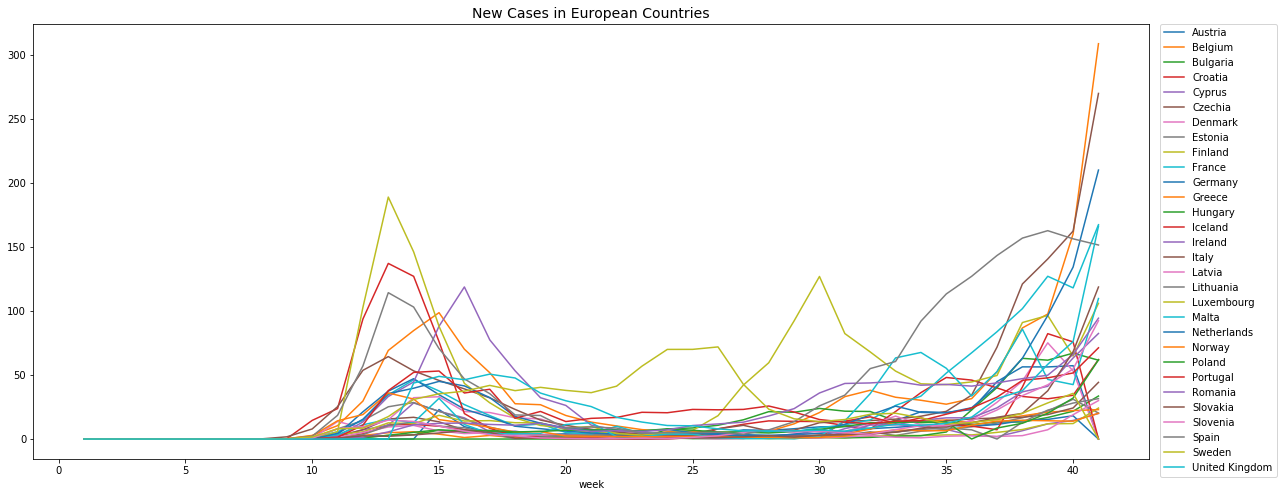

In [404]:
# line plot of new cases (transposed)
new_cases.T.plot.line(figsize=(20,8))
plt.title('New Cases in European Countries',fontsize=14);
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.);

Finally, we see a similar trend in new cases, as we did in positivity rate. The difference between the plot of positivity rate and of new cases is that positivity rate is the percentage of tests done which were positive, whereas new cases is the percentage of the population (per thousand) of new cases. 

Now with some idea of the range of responses among countries, we can see how countries compare based on their population classification as either Small or Large, and in particular, we can see how Ireland compares against countries in these two categories. 

We concatenate our population dataframe with 'size' column to our dataframes of measures above. Although we also have the population measure in the europe_weekly_tests dataset, it was done in this way as the europe_populations dataset does not have repeated entries of countries, whereas the europe_weekly_tests dataset does have repeated entries of countries. 


Then we plot all three measures side-by-side, coloured by their size category, and plot Ireland on top for comparison. This is done on a darker background, to aid visualisation. 

In [405]:
# concatenate with europe_populations to get 'Small' or 'Large' category.

testing_rate_populations = pd.concat([europe_populations,testing_rate],axis=1)
positivity_rate_populations = pd.concat([europe_populations,positivity_rate],axis=1)
new_cases_populations = pd.concat([europe_populations,new_cases],axis=1)

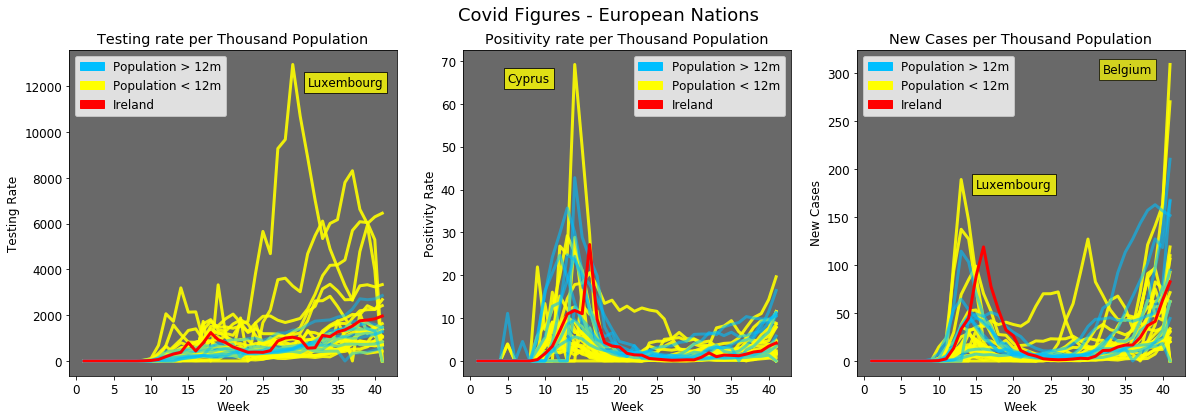

In [406]:
# plotting for visual comparison of measures between large & small countries, and Ireland

# creating colour patches for legend
large_patch = mpatches.Patch(color='deepskyblue', label='Population > 12m')
small_patch = mpatches.Patch(color='yellow', label='Population < 12m')
ireland_patch = mpatches.Patch(color='red', label='Ireland')

# background colour for plots
plt.rcParams['axes.facecolor'] = 'dimgray'
plt.rcParams.update({'font.size': 12})

# initialising figure and subplots, with main title
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))
fig.suptitle('Covid Figures - European Nations',fontsize=18)

# plotted as for loop to colour country by designation as Small or Large
for ctry in testing_rate_populations.index:
    if ctry != 'Ireland':  # excepting Ireland
        if testing_rate_populations.loc[ctry]['size'] == 'Small':
            ax1.plot(testing_rate_populations.loc[ctry][2:],linewidth=3, color='yellow',alpha=0.9)
        else:
            ax1.plot(testing_rate_populations.loc[ctry][2:],linewidth=3, color = 'deepskyblue',alpha=0.5)
            
# adding Ireland
ax1.plot(testing_rate_populations.loc['Ireland'][2:],linewidth=3, color = 'red');
# adding textbox for country with highest value
ax1.text(31,12000,'Luxembourg',bbox=dict(facecolor='yellow', alpha=0.8))
# subtitle for plot
ax1.set(xlabel='Week', ylabel='Testing Rate',title='Testing rate per Thousand Population')
# legend
ax1.legend(handles=[large_patch,small_patch,ireland_patch],facecolor='white')


# similar to above
for ctry in positivity_rate_populations.index:
    if ctry != 'Ireland':
        if positivity_rate_populations.loc[ctry]['size'] == 'Small':
            ax2.plot(positivity_rate_populations.loc[ctry][2:], linewidth=3,color='yellow',alpha=0.9)
        else:
            ax2.plot(positivity_rate_populations.loc[ctry][2:], linewidth=3,color = 'deepskyblue',alpha=0.6)
            
ax2.plot(positivity_rate_populations.loc['Ireland'][2:],linewidth=3, color = 'red');
# adding text box for country with highest value
ax2.text(5,65,'Cyprus',bbox=dict(facecolor='yellow', alpha=0.8))
ax2.set(xlabel='Week', ylabel='Positivity Rate',title='Positivity rate per Thousand Population')
ax2.legend(handles=[large_patch,small_patch,ireland_patch],facecolor='white')


# similar to above
for ctry in new_cases_populations.index:
    if ctry != 'Ireland':
        if new_cases_populations.loc[ctry]['size'] == 'Small':
            ax3.plot(new_cases_populations.loc[ctry][2:], linewidth=3,color='yellow',alpha=0.9)
        else:
            ax3.plot(new_cases_populations.loc[ctry][2:], linewidth=3,color = 'deepskyblue',alpha=0.6)
            
ax3.plot(new_cases_populations.loc['Ireland'][2:],linewidth=3, color = 'red')
# adding text box for countries with highest values
ax3.text(15,180,'Luxembourg',bbox=dict(facecolor='yellow', alpha=0.8))
ax3.text(32,300,'Belgium',bbox=dict(facecolor='yellow', alpha=0.7))
ax3.set(xlabel='Week', ylabel='New Cases',title='New Cases per Thousand Population')
ax3.legend(handles=[large_patch,small_patch,ireland_patch],facecolor='white');

Here we can see a much more interesting of large vs small nations, and especially with regard to Ireland. Of note is that in all plots, the countries with the highest values are all countries with populations less than 12 million. No country with a large population seems to have a very strong implementation of testing, compared to countries with smaller populations. However, countries with smaller populations seem to have higher spikes of positive testing rates and new cases, compared to countries with larger populations. 

Ireland follows the trend of many countries, with an average response to testing rate. Its positivity rate is shown as a spike comparable to that of many other countries, though a little lagged - its spike in the middle plot is one of the latest ones. Its spike in the third plot, for new cases, is also late, and relatively high compared to other countries of its size (the outliers such as Luxembourg and Belgium excepted).

Before focusing deeper on Ireland's data, we will compare Ireland to its European neighbours on the second aspect of our study - economy. We will visually compare unemployment figures for the last twenty years between European countries, and look at the range of unemployment figures in a table for comparison. 

As with before, an initial line plot gives us some idea of the range of unemployment levels over the last 20 years, but it is hard to read more detail. We see that the highest figures are around 25%, with the lowest almost at 0. There is a large jump for many if not all countries around 2008, in the aftermath of the economic crash. 

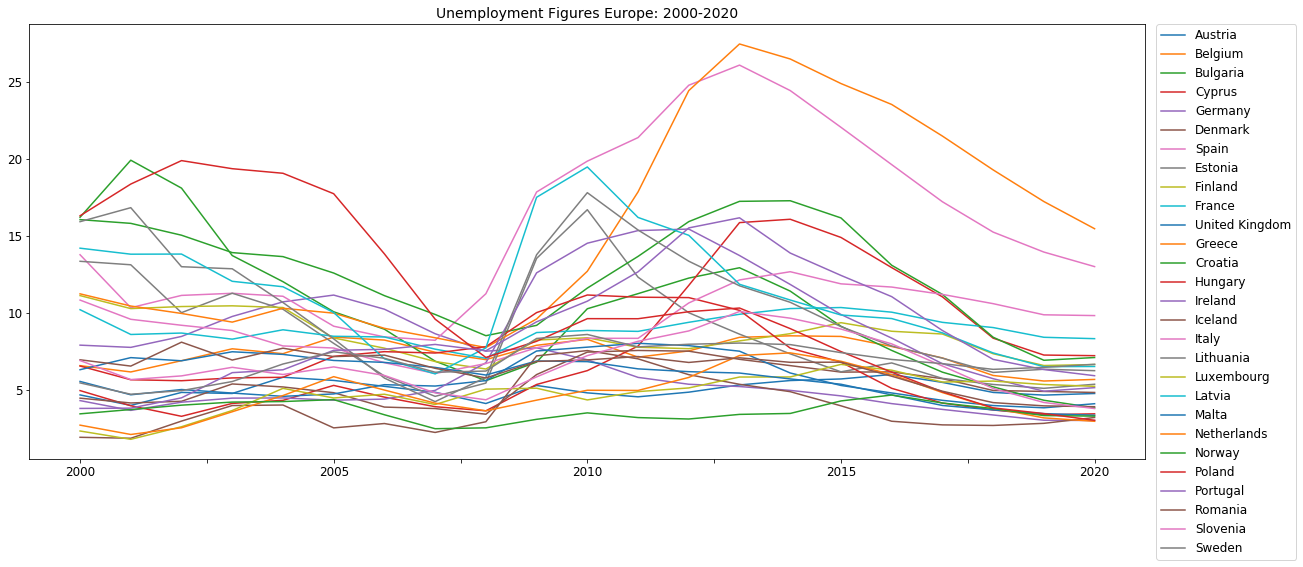

In [407]:
plt.rcParams['axes.facecolor'] = 'white'

europe_unemployment.T.plot.line(figsize=(20,8))
plt.title('Unemployment Figures Europe: 2000-2020',fontsize=14);
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.);

In order to get a better idea visually of what is happening, and how Ireland compares, we will do the following:

* plot all countries, except Ireland
* colour countries according to their maximum recorded unemployment figure - red being high and blue being low
* hence the country with the highest recorded unemployment figure will be the reddest, and the country with the lowest recorded unemployment figure will be the bluest
* all other countries will fall into a spectrum in between
* Ireland will be plotted on top of these, with a black dashed line, in order to compare better

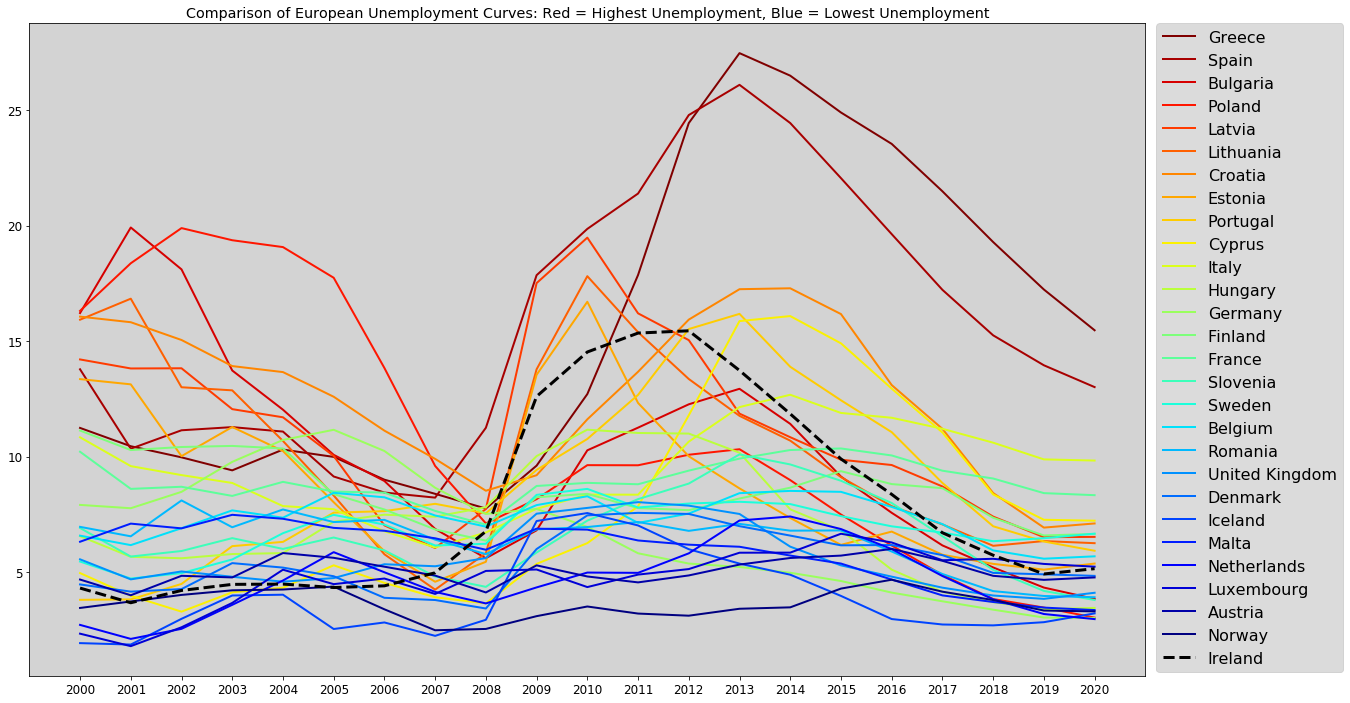

In [408]:
# setting colours - 27 countries in dataset with Ireland being removed
n = 27 
colors = plt.cm.jet(np.linspace(1,0,n)) # 27 equally spaced colours along spectrum

# drop Ireland, get maximum unemployment per country, sort from highest to lowest
unemployment_sorted = europe_unemployment.drop(['Ireland'],axis=0).max(axis=1).sort_values(ascending=False)

# plot
plt.figure(figsize=(20,12))
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.title('Comparison of European Unemployment Curves: Red = Highest Unemployment, Blue = Lowest Unemployment')

# loop to assign colours to countries based on order in unemployment_sorted dataframe 
for i in range(len(unemployment_sorted)):
    ctry = unemployment_sorted.index[i]
    plt.plot(europe_unemployment.loc[ctry], color=colors[i],linewidth=2, label = ctry)


plt.plot(europe_unemployment.loc['Ireland'],'--',color='black',linewidth=3,label='Ireland');
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.,fontsize=16);

Here we see much more clearly what is going on. Generally, the countries with the lowest maximum unemployment figure, start low and stay low. Conversely, those with high maximum unemployment figures, are a lot more unstable. 

We can see that Ireland has the unviable position of starting among the countries with the lowest maximum unemployment figures, but rising to be among those with some of the highest maximum unemployment figures. Indeed, very few countries which start with Ireland on the left hand side of the graph, continue its path along the midpoint to the peak of its unemployment levels. 

We can see that in the table below, which lists minimum and maximum recorded unemployment figures per country, as well as the range (maximum minus minimum) which each country traverses. 

In [409]:
# create minimum and maximum figures, and range
minimum_unemployment = europe_unemployment.min(axis=1)
maximum_unemployment = europe_unemployment.max(axis=1)
unemployment_range = maximum_unemployment - minimum_unemployment

# concatenate them as table, store as data frame, rename columns, sort by Range
unemployment_table = DataFrame(pd.concat([minimum_unemployment,maximum_unemployment,unemployment_range],axis=1))
unemployment_table.columns = ['Lowest Unemployment 2000-2020','Highest Unemployment 2000-2020','Range']
unemployment_table.sort_values(by='Range',ascending=False)

,Lowest Unemployment 2000-2020,Highest Unemployment 2000-2020,Range
Greece,7.760,27.466000,19.705999
Spain,8.232,26.094000,17.862000
Poland,3.040,19.895000,16.855000
Bulgaria,3.850,19.921000,16.071000
Lithuania,4.250,17.813999,13.563999
Latvia,6.052,19.482000,13.430000
Cyprus,3.298,16.087999,12.789999
Portugal,3.809,16.183001,12.374001
Estonia,4.592,16.707001,12.115001
Ireland,3.683,15.451000,11.768000


We see that our large range of minimum to maximum unemployment puts us between countries such as Croatia, Estonia and Portugal. In fact, at 11.768, the jump from our minimum to maximum unemployment figures is almost twice the median figure of 6.45. 

In [410]:
unemployment_range.median()

6.4539999975

The next step in our analysis is to focus on Ireland as a case-study for the impact of the COVID pandemic on the hospitalisation figures, testing figures, deaths, and unemployment figures of a country. Not much preprocessing is required of the data. We drop the columns X and Y, which are just geographic coordinates for Ireland, and drop the column StatisticsProfileDate also, as we already have a date column.

We then do an exploratory data analysis of several variables to investigate how COVID spread across the country.

In [411]:
# drop X, Y, StatisticsProfileDate
ireland_hospitals.drop(['X','Y','StatisticsProfileDate'],axis=1,inplace=True)

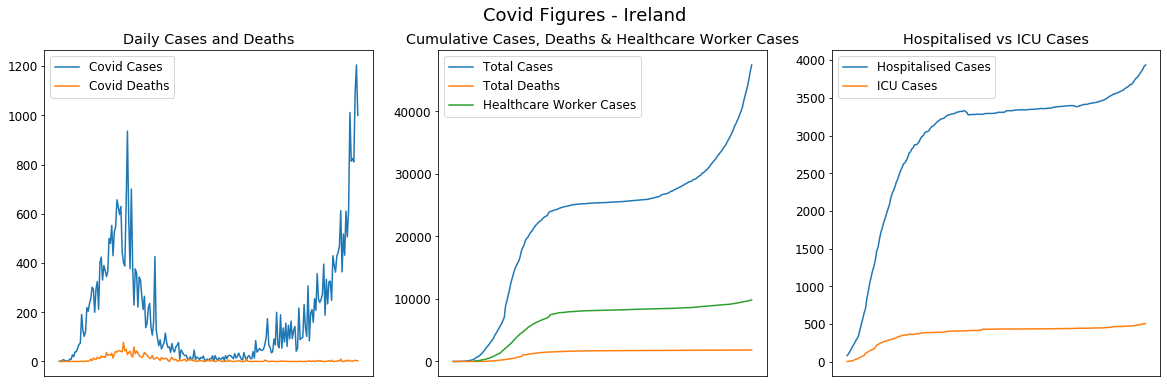

In [414]:
# reset background colour
plt.rcParams['axes.facecolor'] = 'white'

# initialise figure and subplots
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))
fig.suptitle('Covid Figures - Ireland',fontsize=18)

# plot ConfirmedCovidCases against ConfirmedCovid Deaths
ax1.plot(ireland_hospitals.Date, ireland_hospitals.ConfirmedCovidCases,label='Covid Cases')
ax1.plot(ireland_hospitals.Date, ireland_hospitals.ConfirmedCovidDeaths,label='Covid Deaths')
ax1.legend()
ax1.set(title='Daily Cases and Deaths')
ax1.set_xticks([]) # supress xticks for visualisation

# plot TotalConfirmedCovidCases against TotalCovidDeaths against HealthcareWorkersCovidCases
ax2.plot(ireland_hospitals.Date, ireland_hospitals.TotalConfirmedCovidCases,label='Total Cases')
ax2.plot(ireland_hospitals.Date, ireland_hospitals.TotalCovidDeaths,label='Total Deaths')
ax2.plot(ireland_hospitals.Date, ireland_hospitals.HealthcareWorkersCovidCases,label='Healthcare Worker Cases')
ax2.legend()
ax2.set(title='Cumulative Cases, Deaths & Healthcare Worker Cases')
ax2.set_xticks([]) # supress xticks

# plot HospitalisedCovidCases against RequiringICUCovidCases
ax3.plot(ireland_hospitals.Date, ireland_hospitals.HospitalisedCovidCases,label='Hospitalised Cases')
ax3.plot(ireland_hospitals.Date, ireland_hospitals.RequiringICUCovidCases,label='ICU Cases')
ax3.legend()
ax3.set(title='Hospitalised vs ICU Cases')
ax3.set_xticks([]); # supress xticks

We can see from the first plot that there are two spikes of daily cases. These correspond to the spikes seen above - around March and again around September. There is a small spike in daily COVID deaths at the time of the first spike of cases, but the deaths remain stable throughout the second spike. This is possibly due to the health service being better prepared and knowledgeable about the disease and how to treat it the second time around. Note - these data do not record deaths due to other factors, e.g. cancer due to having an operation cancelled because of the pandemic, or a heart attack whose treatment was delayed due to hospitals being overwhelmed. 

In the second plot, we see the same data reflected as above - an increasing number of cases with two surges, but the death rate staying staying. The number of healthcare worker cases also stabilises - possibly due to the implementation of PPE and other hygiene measures in the face of the virus. 

In the third plot, we see a singular large surge in hospitalisations, and a less dramatic second surge towards the time of the second spike. We see that in plots one and two, there is a large increase in cases in the second surge. This does not seem to be reflected in the hospitalisation figures - it is not clear why an increase in cases is not reflected in equal increase in hospitalisation figures. More research would have to be done here in conjunction with healthcare professionals. Similarly, the rate of ICU cases stays relatively stable after the first spike.

It is known that COVID seems to have the strongest impact on older people. Therefore it might be useful to look at hospitalisations plotted by age group, as done below. 

First we look at hospitalisations per age group, and see that the group which requires the most hospitalisations is by far the age group of those 65 and above, and there is a large gap between that group and all other groups. Hospitalisations of people under 14 due to COVID seems to be extremely small. 

There is a small downward spike in the hospitalisations of those aged 65 and above - it is not clear what this is. However, it is brief, and the upward trend continues afterwards. Therefore, it is not absolutely necessary to investigate this spike at this time. Further research with professionals from the health service might be able to ascertain whether this brief drop is due to a data recording error, or due to some measures or policy implemented by the HSE at that time. 

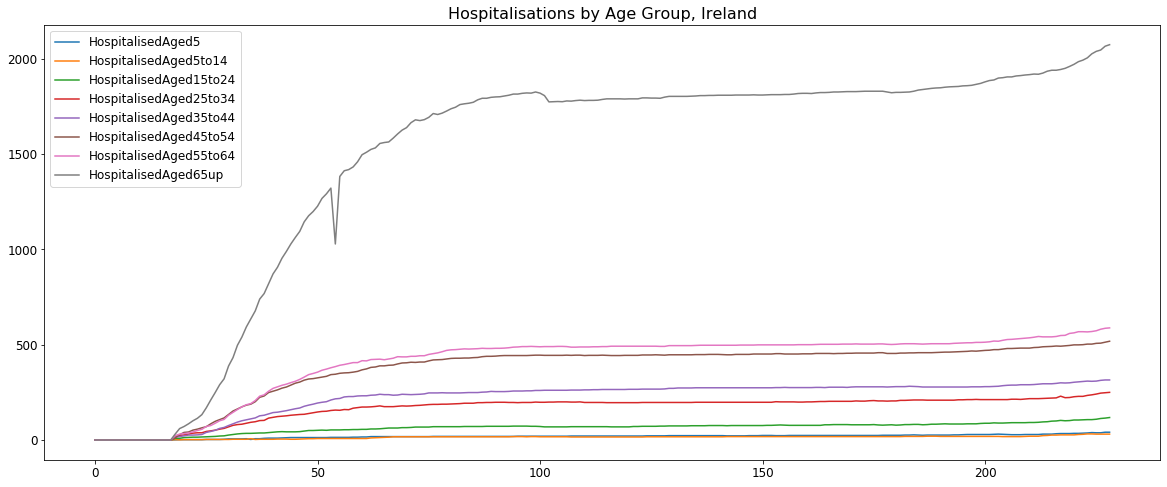

In [415]:
ireland_hospitals.iloc[:,10:18].fillna(0).plot.line(figsize=(20,8))
plt.title('Hospitalisations by Age Group, Ireland',fontsize=16);

We then look at cumulative cases per age group. The findings here are worth commenting on.

First, we see a very pronounced drop in the cases of those aged 65 and up. As all other lines are increasing, i.e. all the data is cumulative, this should not happen, and is likely a data entry error. We will leave it in, as all other data for that age group seem to reflect the general trend that we expect, but further investigation would be warranted on this particular data point by consulting with the data provider. 

Interestingly, although cases for those 65 and up increase at a quicker rate than those for other age groups, they stabilise after the first large increase, whereas other age groups - such as those between 25 and 54, all rise almost to the same cumulative level. This might be evidence of two things: firstly, that younger people are more likely to be asymptomatic carriers, and therefore less likely to get tested, and secondly, that during the second wave, it was mostly younger people who were getting infected, as older groups were continuing to self-isolate. More investigation would be warranted here before these conclusions could be safely drawn, but just as a general analysis, it is an interesting trend. 



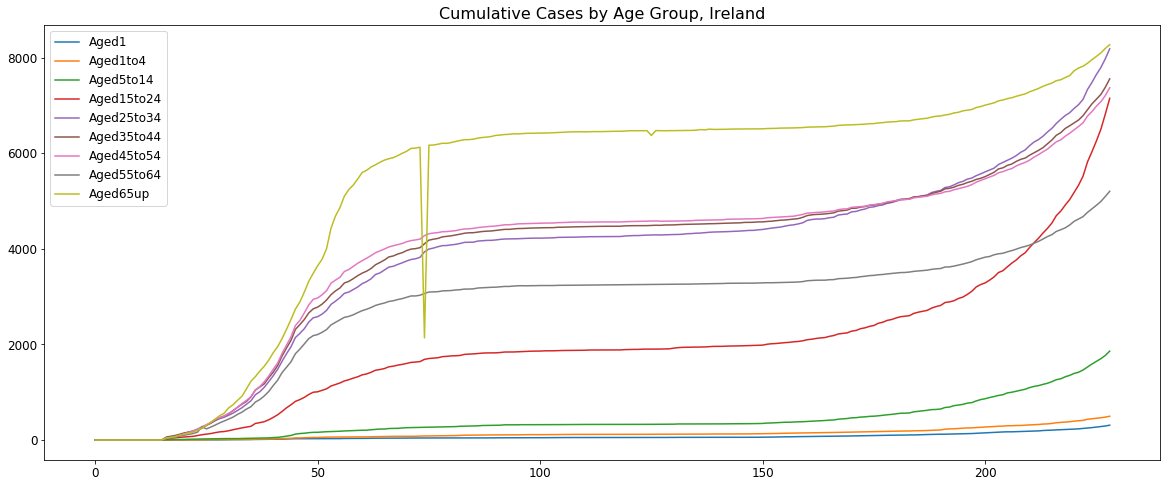

In [416]:
ireland_hospitals.iloc[:,21:30].fillna(0).plot.line(figsize=(20,8))
plt.title('Cumulative Cases by Age Group, Ireland',fontsize=16);

The final point worth commenting on is the distribution of median age in the cases, and the differences in figures between male and female cases. Though it has been commented on that the deaths from COVID are majority male, we find that there are more cases among females than males in the dataset. However, this relies on the assumption that males and females are getting tested equally as much as each other. 

The minimum median age for cases is 41, and the maximum age is 49. This is also interesting, given the talk about the disease mostly being a concern for older people. As the full effects of COVID on long term chronic issues and life span are not yet known, it remains to be seen what impact might be seen on health issues and life expectancy of these middle-aged people in the coming decades.

In [417]:
print('Minimum median age: ', ireland_hospitals.Median_Age.min())
print('Maximum median age: ', ireland_hospitals.Median_Age.max())
print('Median of median age: ', ireland_hospitals.Median_Age.median())

Minimum median age:  41.0
Maximum median age:  49.0
Median of median age:  48.0


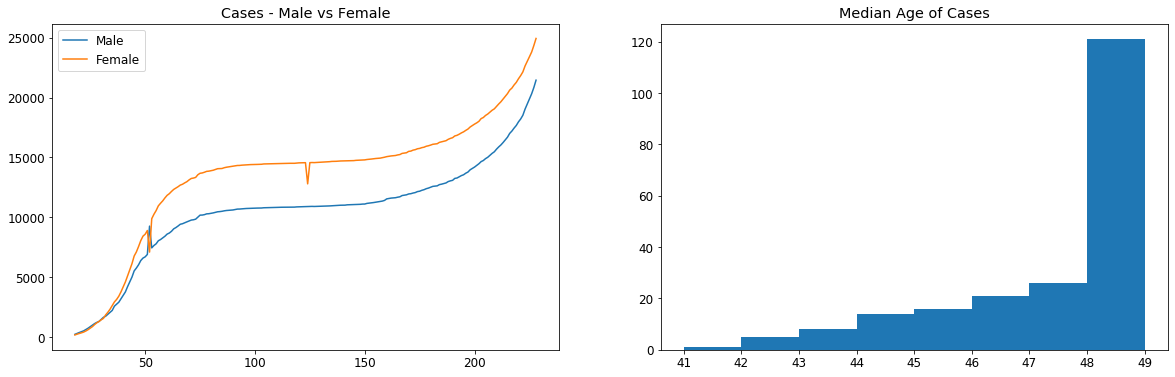

In [418]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize= (20,6))

ax1.plot(ireland_hospitals.iloc[:,18],label='Male')
ax1.plot(ireland_hospitals.iloc[:,19],label='Female')
ax1.set(title = 'Cases - Male vs Female')
ax1.legend()

ax2.hist(ireland_hospitals.iloc[:,30].dropna(),bins=8)
ax2.set(title='Median Age of Cases');

Finally, we will look at figures for individual counties, to see if any counties were particularly badly hit or left particularly untouched by COVID. Using ireland_county_cases, we select the measure PopulationProportionCovidCases. Unfortunately, ConfirmedCovidDeaths and ConfirmedCovidRecovered only hold NA values. This is an issue with the data itself, and cannot be remedied here. 

In [419]:
ireland_county_cases.TimeStamp = pd.to_datetime(ireland_county_cases.TimeStamp).dt.strftime('%d-%m')
county_cases = ireland_county_cases.iloc[:,[2,4,11]]
county_cases.head()

,CountyName,TimeStamp,PopulationProportionCovidCases
0,Carlow,27-02,NaN
1,Cavan,27-02,NaN
2,Clare,27-02,NaN
3,Cork,27-02,NaN
4,Donegal,27-02,NaN


We then pivot the dataframe to change the TimeStamp into weekly measures. Several columns seem to have NaN columns for every observation. In this case, because we can't assume that NA values are 0, and because the NA values are entire columns, the best option is to just remove these columns.

In [420]:
# subset and then pivot 
proportion_cases = county_cases[['CountyName','TimeStamp','PopulationProportionCovidCases']]
proportion_cases = proportion_cases.pivot(index='CountyName',columns='TimeStamp',values='PopulationProportionCovidCases')

# drop na columns
proportion_cases.dropna(axis=1,inplace=True)
proportion_cases

TimeStamp,01-04,01-05,01-06,01-07,01-08,01-09,01-10,02-04,02-05,02-06,02-07,02-08,02-09,02-10,03-04,03-05,03-06,03-07,03-08,03-09,03-10,04-04,04-05,04-06,04-07,04-08,04-09,04-10,05-04,05-05,05-06,05-07,05-08,05-09,05-10,06-04,06-05,06-06,06-07,06-08,06-09,06-10,07-04,07-05,07-06,07-07,07-08,07-09,07-10,08-04,...,24-06,24-07,24-08,24-09,25-03,25-04,25-05,25-06,25-07,25-08,25-09,26-03,26-04,26-05,26-06,26-07,26-08,26-09,27-03,27-04,27-05,27-06,27-07,27-08,27-09,28-03,28-04,28-05,28-06,28-07,28-08,28-09,29-03,29-04,29-05,29-06,29-07,29-08,29-09,30-03,30-04,30-05,30-06,30-07,30-08,30-09,31-03,31-05,31-07,31-08
CountyName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Carlow,5.269444,221.316658,291.575915,307.384248,314.410173,437.363873,512.892574,10.538888,223.073140,296.845359,307.384248,314.410173,440.876836,525.187943,21.077777,223.073140,296.845359,307.384248,314.410173,444.389798,526.944425,21.077777,231.855547,295.088878,307.384248,316.166655,446.146280,528.700906,21.077777,231.855547,295.088878,307.384248,316.166655,447.902761,528.700906,26.347221,233.612028,295.088878,307.384248,317.923136,447.902761,530.457388,28.103703,238.881473,293.332396,307.384248,324.949062,447.902761,530.457388,33.373147,...,307.384248,314.410173,391.695356,493.571278,5.269444,161.596290,266.985175,307.384248,314.410173,414.529614,493.571278,5.269444,163.352772,270.498138,307.384248,314.410173,419.799059,493.571278,5.269444,166.865735,272.254619,307.384248,314.410173,426.824984,493.571278,5.269444,166.865735,277.524064,307.384248,314.410173,428.581466,500.597204,5.269444,175.648142,291.575915,307.384248,314.410173,432.094428,502.353685,5.269444,175.648142,291.575915,307.384248,314.410173,432.094428,511.136092,5.269444,291.575915,314.410173,433.850910
Cavan,53.822726,883.480361,1107.960512,1131.590002,1149.968494,1174.910733,1275.992439,87.954211,895.295106,1110.586011,1134.215501,1149.968494,1174.910733,1286.494434,99.768956,911.048099,1121.088007,1134.215501,1152.593993,1174.910733,1293.058181,150.966184,930.739340,1126.339004,1134.215501,1152.593993,1181.474480,1320.625919,161.468179,932.052090,1126.339004,1134.215501,1152.593993,1181.474480,1340.317160,169.344675,958.307078,1126.339004,1134.215501,1155.219492,1182.787230,1350.819156,173.282924,981.936568,1126.339004,1135.528250,1156.532241,1184.099979,1381.012392,198.225163,...,1131.590002,1138.153749,1163.095988,1222.169712,11.814745,799.464398,1088.269271,1131.590002,1138.153749,1163.095988,1223.482462,14.440244,823.093888,1093.520269,1131.590002,1138.153749,1168.346986,1235.297206,24.942239,832.283134,1093.520269,1131.590002,1139.466499,1170.972485,1239.235455,31.505986,832.283134,1093.520269,1131.590002,1139.466499,1170.972485,1241.860954,40.695232,845.410628,1094.833018,1131.590002,1142.091997,1170.972485,1251.050200,47.258979,861.163621,1101.396765,1131.590002,1142.091997,1170.972485,1264.177694,51.197227,1107.960512,1149.968494,1174.910733
Clare,42.081520,201.991298,310.561620,309.719990,329.077489,398.091182,512.552918,45.448042,206.199450,310.561620,309.719990,335.810532,398.932813,526.860634,45.448042,209.565971,310.561620,309.719990,335.810532,401.457704,541.168351,50.497824,213.774123,309.719990,309.719990,335.810532,402.299334,568.100524,54.705976,236.498144,309.719990,309.719990,337.493793,403.140965,595.032697,55.547607,251.647492,309.719990,309.719990,337.493793,403.140965,611.865305,57.230868,255.014013,309.719990,309.719990,339.177054,409.874008,637.955848,58.072498,...,310.561620,313.086511,379.575313,457.005311,21.882391,178.425646,271.004991,310.561620,313.086511,379.575313,459.530202,26.090543,192.733363,271.004991,310.561620,313.086511,382.941835,469.629767,28.615434,195.258254,271.004991,310.561620,319.819554,384.625096,472.996288,28.615434,195.258254,271.846621,310.561620,319.819554,387.991617,478.046071,33.665216,198.624776,271.846621,309.719990,329.077489,389.674878,490.670527,37.873368,199.466406,302.986946,309.71

To get an idea of proportions, we can look at the maximum recorded values of proportion cases for each county. We see that counties Cavan, Monaghan, Dublin and Kildare are all counties which had a very high proportion of cases, relative to their populations. 

In [421]:
proportion_cases.max(axis=1).sort_values(ascending=False)

CountyName
Cavan        1904.799412
Monaghan     1479.164630
Dublin       1477.928303
Kildare      1364.020422
Westmeath    1098.344035
Offaly       1087.723349
Longford     1081.398478
Donegal       981.205086
Louth         972.967940
Roscommon     915.654437
Meath         913.127294
Clare         811.331712
Wicklow       744.953484
Laois         708.407618
Limerick      701.388925
Cork          636.066226
Mayo          604.565272
Carlow        595.447200
Tipperary     579.744662
Kilkenny      575.419220
Leitrim       530.520534
Sligo         518.806745
Galway        507.250308
Wexford       457.514594
Kerry         442.768454
Waterford     378.735711
dtype: float64

We then standardise the data by subtracting the county mean from each county entry, and then divide by the county standard deviation. This is done in a for-loop as vectorised implementation was returning all NaN values. 

In [422]:
means = proportion_cases.mean(axis=1)
stdevs = proportion_cases.std(axis=1)

In [423]:
for i in range(len(proportion_cases)):
    proportion_cases.iloc[i] = (proportion_cases.iloc[i] - means[i])/stdevs[i]

Finally, we can subset this to see what counties have a population-proportion of cases more than three standard deviations away from the centre of the data, and are hence particularly interesting. 

We see that, of the four counties mentioned above with very high proportions, none are classified as outliers in the below data. Instead, all the outliers seem to be remarkable in their low levels of proportions of cases, relative to population. 

In [424]:
proportion_cases[((np.abs(proportion_cases))>3).any(1)]

TimeStamp,01-04,01-05,01-06,01-07,01-08,01-09,01-10,02-04,02-05,02-06,02-07,02-08,02-09,02-10,03-04,03-05,03-06,03-07,03-08,03-09,03-10,04-04,04-05,04-06,04-07,04-08,04-09,04-10,05-04,05-05,05-06,05-07,05-08,05-09,05-10,06-04,06-05,06-06,06-07,06-08,06-09,06-10,07-04,07-05,07-06,07-07,07-08,07-09,07-10,08-04,...,24-06,24-07,24-08,24-09,25-03,25-04,25-05,25-06,25-07,25-08,25-09,26-03,26-04,26-05,26-06,26-07,26-08,26-09,27-03,27-04,27-05,27-06,27-07,27-08,27-09,28-03,28-04,28-05,28-06,28-07,28-08,28-09,29-03,29-04,29-05,29-06,29-07,29-08,29-09,30-03,30-04,30-05,30-06,30-07,30-08,30-09,31-03,31-05,31-07,31-08
CountyName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Clare,-1.788333,-0.718700,0.007524,0.001895,0.131376,0.593007,1.358639,-1.765814,-0.690552,0.007524,0.001895,0.176414,0.598637,1.454343,-1.765814,-0.668033,0.007524,0.001895,0.176414,0.615526,1.550047,-1.732036,-0.639885,0.001895,0.001895,0.176414,0.621156,1.730196,-1.703888,-0.487885,0.001895,0.001895,0.187673,0.626785,1.910345,-1.698258,-0.386551,0.001895,0.001895,0.187673,0.626785,2.022938,-1.686999,-0.364032,0.001895,0.001895,0.198932,0.671822,2.197457,-1.681370,...,0.007524,0.024413,0.469155,0.987083,-1.923444,-0.876330,-0.257069,0.007524,0.024413,0.469155,1.003972,-1.895296,-0.780626,-0.257069,0.007524,0.024413,0.491674,1.071527,-1.878407,-0.763737,-0.257069,0.007524,0.069450,0.502933,1.094046,-1.878407,-0.763737,-0.251439,0.007524,0.069450,0.525452,1.127824,-1.844629,-0.741219,-0.251439,0.001895,0.131376,0.536711,1.212268,-1.816481,-0.735589,-0.043143,0.001895,0.131376,0.547970,1.307972,-1.793962,0.001895,0.131376,0.581748
Cork,-2.123517,-0.541115,0.099467,0.141205,0.190201,0.328117,1.435072,-2.101741,-0.521154,0.106726,0.141205,0.193831,0.331746,1.518548,-2.030968,-0.517524,0.117614,0.143020,0.195645,0.339005,1.618355,-1.996489,-0.490304,0.119429,0.146649,0.199275,0.349893,1.707274,-1.889423,-0.481231,0.121243,0.144834,0.204719,0.358967,1.781676,-1.871276,-0.477601,0.121243,0.146649,0.204719,0.362596,1.896001,-1.796874,-0.466713,0.121243,0.150278,0.217421,0.368040,2.033917,-1.740619,...,0.132131,0.181128,0.286379,0.845301,-2.343093,-0.611888,-0.020302,0.132131,0.181128,0.302711,0.910630,-2.319502,-0.610073,-0.007599,0.132131,0.182943,0.309970,1.008622,-2.275950,-0.591926,0.003289,0.133946,0.182943,0.311785,1.057619,-2.259618,-0.573779,0.017807,0.133946,0.182943,0.319044,1.130206,-2.221510,-0.559262,0.026880,0.133946,0.188387,0.319044,1.239087,-2.190660,-0.555633,0.094023,0.133946,0.190201,0.320858,1.324377,-2.159811,0.099467,0.190201,0.324488
Donegal,-1.613195,-0.193839,-0.134699,-0.179054,-0.138396,0.098164,1.846484,-1.602106,-0.179054,-0.134699,-0.179054,-0.138396,0.098164,2.060866,-1.598410,-0.175358,-0.153181,-0.179054,-0.138396,0.098164,2.175449,-1.517093,-0.171662,-0.153181,-0.175358,-0.119914,0.116645,2.297425,-1.476434,-0.164269,-0.156877,-0.175358,-0.116218,0.124037,2.485933,-1.454256,-0.164269,-0.156877,-0.175358,-0.101433,0.124037,2.707708,-1.435775,-0.164269,-0.156877,-0.171662,-0.097737,0.135126,2.903608,-1.361851,...,-0.182751,-0.153181,0.013150,1.107237,-1.842361,-0.227105,-0.131003,-0.182751,-0.153181,0.013150,1.243997,-1.842361,-0.223409,-0.134699,-0.182751,-0.153181,0.035328,1.329011,-1.809095,-0.219713,-0.134699,-0.182751,-0.149484,0.035328,1.410328,-1.764740,-0.212320,-0.134699,-0.179054,-0.149484,0.087075,1.495342,-1.727778,-0.204928,-0.134699,-0.179054,-0.149484,0.087075,1.609925,-1.664942,-0.201232,-0.134699,-0.179054,-0.145788,0.087075,1.713420,-1.646461,-0.134699,-0.145788,0.098164
Galway,-1.842092,-0.536748,0.035257,0.054812,0.113480,0.206369,1.570381,-1.807870,-0.536748,0.030368,0.054812,0.113480,0.206369,1.658381,-1.793203,-0.517192,0.030368,0.054812,0.113480,0.211258,1.770827,-1.773647,-0.487859,0.030368,0.054812,0.113480,0.245481,1.878383,-1.695424,-0.463414,0.030368,0.054812,0.118369,0.289481,1.912606,-1.666091,-0.458525,0.030368,0.059701,0.118369,0.318815,2.083718,-1.666091,-

In our last step, we will look at monthly unemployment figures for Ireland. We subset our datasets ireland_unemployment_under25 and ireland_unemployment_over25 to give comparable figures for months in 2019 and 2020, for the entire state. First we concatenate the figures for 2019 and 2020 in order to get a visual idea of the unemployment pattern.

In [425]:
# all figures for 2019 and 2020
under_25 = ireland_unemployment_under25.iloc[0,:]
over_25  = ireland_unemployment_over25.iloc[0,:]

# convert to integer
under_25 = under_25.astype(dtype='int32')
over_25  = over_25.astype(dtype='int32')

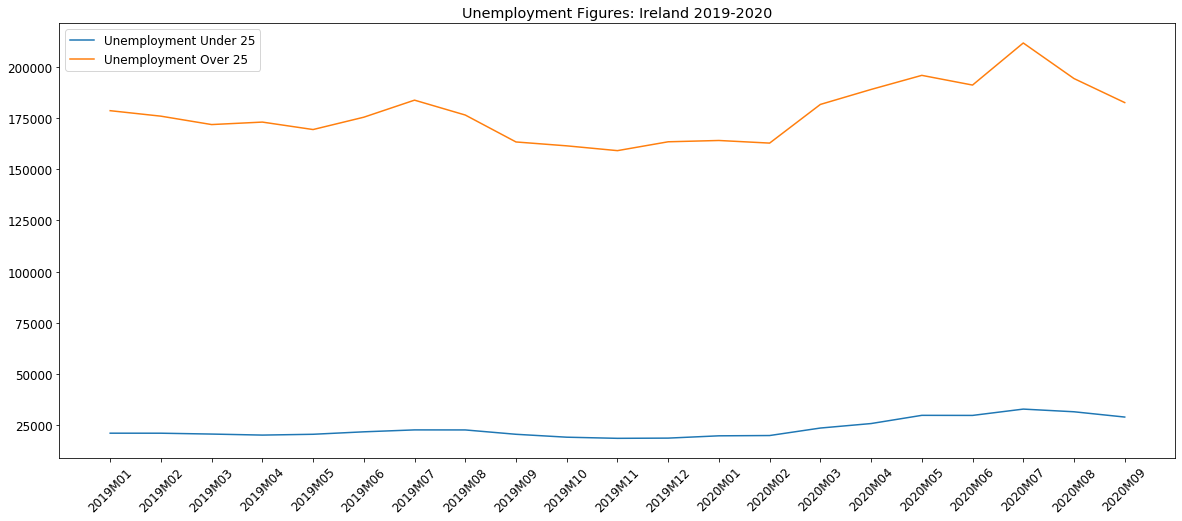

In [428]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.plot(under_25,label='Unemployment Under 25')
plt.plot(over_25, label = 'Unemployment Over 25')
plt.title('Unemployment Figures: Ireland 2019-2020')
plt.legend();

We see that unemployment for those over 25 is much higher - this is to be expected, as more people over 25 work that those under 25. There is a trend upwards in the Over 25 line beginning around February 2020, with a further spike in July. However, these are not nearly as pronounced as the spikes which we saw earlier following the 2008 crash.

In order to compare the years 2019 and 2020, we must restrict ourselves to January to September, as we don't have later data for 2020. We see below tables comparing figures for these months. 

In [429]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']

# months in 2019, unemployment under 25 and over 25
u25_19 = ireland_unemployment_under25.iloc[0,:9]
o25_19 = ireland_unemployment_over25.iloc[0,:9]

# months in 2020, unemployment under 25 and over 25
u25_20 = ireland_unemployment_under25.iloc[0,12:]
o25_20 = ireland_unemployment_over25.iloc[0,12:]

In [430]:
# reset all indices to months, in order to concatenate and compare
u25_19.index = months
o25_19.index = months
u25_20.index = months
o25_20.index = months

# concatenate under 25 unemployment figures for Jan-Sept in 2019 and 2020
under25 = pd.concat([u25_19,u25_20],axis=1)
under25.columns = ['2019','2020']

# concatenate over 25 unemployment figures for Jan-Sept in 2019 and 2020
over25 = pd.concat([o25_19,o25_20],axis=1)
over25.columns = ['2019','2020']

Now we can compare our figures side-by-side in order to see how each month differs between 2019 and 2020.

In [431]:
under25

,2019,2020
Jan,20877,19591
Feb,20868,19732
Mar,20450,23397
Apr,19949,25598
May,20347,29617
Jun,21548,29579
Jul,22490,32671
Aug,22471,31364
Sep,20342,28777


In [432]:
over25

,2019,2020
Jan,178750,164164
Feb,176066,162884
Mar,171957,181812
Apr,173169,189143
May,169520,196045
Jun,175560,191292
Jul,183906,211891
Aug,176622,194480
Sep,163441,182715


Finally, we would like to test whether the differences between the figures for 2019 and those for 2020 are statistically significant. We cannot necessarily assume normality in the data, so we will use both a parametric and a non-parametric test. The parametric test will be a paired t-test, and the non-parametric test will be a Mann Whitney U Test. 

In [433]:
# import scipy
import scipy.stats as stats

In [434]:
# convert under and over 25 unemployment figures to integer
u25_19 = u25_19.astype(dtype='int32')
u25_20 = u25_20.astype(dtype='int32')
o25_19 = o25_19.astype(dtype='int32')
o25_20 = o25_20.astype(dtype='int32')

In [435]:
print('Results of statistical tests')
print('-----------------------------')
print('\n')

print('Paired t-test, unequal variance, under 25s: ', stats.ttest_ind(u25_19,u25_20,equal_var=False))
print('Mann Whitney U test, under 25s: ', stats.mannwhitneyu(u25_19,u25_20))

print('\n')
print('Paired t-test, unequal variance, over 25s: ', stats.ttest_ind(o25_19,o25_20,equal_var=False))
print('Mann Whitney U test, over 25s:, ', stats.mannwhitneyu(o25_19,o25_20))

Results of statistical tests
-----------------------------


Paired t-test, unequal variance, under 25s:  Ttest_indResult(statistic=-3.4273044748288712, pvalue=0.008084152872653044)
Mann Whitney U test, under 25s:  MannwhitneyuResult(statistic=18.0, pvalue=0.026029384375300103)


Paired t-test, unequal variance, over 25s:  Ttest_indResult(statistic=-2.1240534485400095, pvalue=0.05907720625381351)
Mann Whitney U test, over 25s:,  MannwhitneyuResult(statistic=19.0, pvalue=0.03184488756831434)


Our non-parametric Mann Whitney U tests tell us that there is a statistically significant difference between the unemployment figures between 2019 and 2020 for both under 25s and over 25s. Interestingly, our paired t-test returns a non-significant p-value for the difference between unemployment figures for over 25s between 2019 and 2020. This is exactly the group in which we expect there to be a difference. However, our paired t-tests make assumptions about parameters which our Mann Whitney U tests do not, and so in this case it is likely safer to go with the conclusion of the Mann Whitney U test for the over 25s and conclude that there is indeed a difference between unemployment figures for 2019 and 2020. 

# Final Remarks

Through the undertaking of this exploratory study, the hope was to shed light on what has been a very difficult and uncertain time for everyone. Although the full impact of COVID is as yet unknown, and hence it is difficult to predict what will come, it is hoped that the information gleaned in this study can give some insights into how certain countries, Ireland in particular, has managed, and how it will hopefully manage in the future. 

It was seen that, despite an initial surge in cases and hospitalisations, the death rate for the disease remained low. Although the second wave caused many more cases to be recorded among younger age groups and the middle-aged, this uptake was not reflected in an increase among the elderly - those most at risk from the effects of COVID. It was seen that many countries in Europe, despite population size, had similar approaches to how they implemented testing in the initial weeks of the pandemic, and that the initial lockdown, though still controversial among more than a few voices, served to significantly cut transmission of the virus, as well as hospitalisation numbers. 

The economic impact through unemployment figures shows that, at least tentatively, we do not see the same catastrophic rise in unemployment levels during the pandemic and lockdown as we saw in the aftermath of the 2008 crash. Though it remains to be seen what the economic impact will be in the coming months and years, it is hoped that the (relatively) gentle increase in unemployment is an indicator that the economy will remain fairly stable and that the economic impacts of lockdown will not be too heavy for many. 

In a period in which many people and organisations have claimed to have answers, the reality is that very few do. This study has served only to scratch the surface of the impact of COVID on a small part of the globe. Further study into unemployment data from many other countries, to compare and contrast, is highly encouraged. There are also several other markers of economic health, and it would be beneficial to see what impact the pandemic and the lockdown have had on these also. Nevertheless, it remains to be stated that, as with the initial onset of the pandemic, the future remains unknown, and any studies of this kind only serve as a potential roadmap, not a crystal ball. 